In [1]:
import torch

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # nn.Conv2d输入为inputchannel，outchannel，kenrnel size
        # 输入图像是单通道，conv1 kenrnel size=5*5，输出通道 6
        self.conv1 = nn.Conv2d(1, 6, 5)
        # conv2 kernel size=5*5, 输出通道 16
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 全连接层 展平为一维数组 16 * 5 * 5为数组长度，输出为大小 120
        self.fc1 = nn.Linear(16*5*5, 120)
        # 全连接层 输入为大小120，输出为 84
        self.fc2 = nn.Linear(120, 84)
        # 全连接层 输入为84，输出为 10
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # max-pooling 采用一个 (2,2) 的滑动窗口
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 核(kernel)大小是方形的话，可仅定义一个数字，如 (2,2) 用 2 即可
        # x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        # 和 numpy reshape 一样 所有特征展平，然后传给下面的只能接收一维数据的层，比如全连接层。Flatten()层就是这个作用 
        # ***x.view(-1, x.size()[1:].numel())等价于x.view(-1, self.num_flat_features(x))***
        
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        #所有特征展平，然后传给下面的只能接收一维数据的层，比如全连接层。Flatten()层就是这个作用
        # 除了 batch 维度外的所有维度
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [8]:
params = list(net.parameters())
#print('参数: ', params)
print('参数数量: ', len(params))
# conv1.weight
print(params[0])

print('第一个参数大小: ', params[0].size())

参数数量:  10
Parameter containing:
tensor([[[[-0.1650,  0.1949, -0.1244,  0.0686,  0.1221],
          [ 0.0093, -0.1486, -0.1553,  0.1525, -0.1675],
          [-0.1151, -0.0576, -0.0124,  0.1874,  0.0760],
          [-0.1022,  0.1734, -0.1531,  0.0133,  0.0405],
          [ 0.0207, -0.1973,  0.0833, -0.1174, -0.1939]]],


        [[[-0.1455,  0.1274,  0.1812,  0.1520,  0.0449],
          [-0.0105, -0.0148, -0.0550,  0.0099,  0.1938],
          [ 0.1175,  0.1397,  0.0913, -0.1038,  0.0786],
          [-0.1386,  0.0457, -0.1697,  0.0552,  0.1708],
          [ 0.0672, -0.1895,  0.0005, -0.1695,  0.1629]]],


        [[[ 0.1538,  0.1051,  0.1947, -0.0328, -0.1808],
          [-0.0382, -0.0183, -0.1144, -0.0076,  0.0036],
          [-0.1907,  0.0151,  0.0077,  0.0553, -0.1308],
          [-0.1481,  0.0398,  0.1397, -0.0799,  0.0645],
          [-0.1865, -0.0695, -0.0947,  0.1035,  0.1078]]],


        [[[ 0.0383, -0.1356, -0.1634, -0.1589, -0.0153],
          [ 0.1961, -0.0670, -0.1183,  0.077

In [12]:
# 随机定义一个变量输入网络
input = torch.randn(1, 1, 32, 32)
print(input)
out = net(input)
print(out)

tensor([[[[-5.4744e-02,  4.7891e-01, -3.6995e-01,  ..., -5.3438e-01,
            1.2987e+00, -3.0009e-01],
          [ 5.0419e-01,  3.9545e-02,  2.2824e+00,  ..., -6.0321e-01,
           -5.6403e-01, -1.6192e-01],
          [-2.0317e+00,  3.7382e-01,  1.0294e+00,  ...,  5.4721e-02,
           -2.7032e-01, -1.1087e+00],
          ...,
          [-1.2426e-01, -1.5966e-03, -9.4551e-01,  ..., -1.3830e+00,
           -3.7314e-01,  1.2613e+00],
          [-1.6126e+00,  6.9614e-02,  8.5440e-01,  ...,  1.5892e+00,
           -1.6140e-01,  1.5084e+00],
          [ 3.1146e-01, -4.0612e-02, -3.0541e-01,  ..., -1.2965e+00,
           -1.5964e+00,  3.4375e-01]]]])
tensor([[-0.0382, -0.2022,  0.1452,  0.0151,  0.1063, -0.0465, -0.0887,  0.0182,
         -0.0362,  0.0888]], grad_fn=<AddmmBackward0>)


In [13]:
#接着反向传播需要先清空梯度缓存，并反向传播随机梯度
net.zero_grad()
out.backward(torch.randn(1, 10))
print(out)

tensor([[-0.0382, -0.2022,  0.1452,  0.0151,  0.1063, -0.0465, -0.0887,  0.0182,
         -0.0362,  0.0888]], grad_fn=<AddmmBackward0>)


In [15]:
output = net(input)
# 定义伪标签
target = torch.randn(10)
# 调整大小，使得和 output 一样的 size
# 展平为 1 维
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

"""
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss
"""

tensor(0.7290, grad_fn=<MseLossBackward0>)


'\ninput -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d\n      -> view -> linear -> relu -> linear -> relu -> linear\n      -> MSELoss\n      -> loss\n'

In [16]:
# MSELoss
print(loss.grad_fn)
# Linear layer
print(loss.grad_fn.next_functions[0][0])
# Relu
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [17]:
# 反向传播
# 清空所有参数的梯度缓存
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0066,  0.0031, -0.0045,  0.0277,  0.0105, -0.0047])


In [20]:
# 更新权重
# 简单实现权重的更新例子
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)
print(net.parameters())

<generator object Module.parameters at 0x000001FC51A72EA0>


In [21]:
# 更新权重（正式版本）
import torch.optim as optim
# 创建优化器
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练过程中执行下列操作
optimizer.zero_grad() # 清空梯度缓存
output = net(input)
loss = criterion(output, target)
loss.backward()
# 更新权重
optimizer.step()

In [22]:
import torch
import torchvision
import torchvision.transforms as transforms

# 将图片数据从 [0,1] 归一化为 [-1, 1] 的取值范围
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


tensor([[[[-0.3490, -0.3176, -0.2941,  ..., -0.6784, -0.7804, -0.8510],
          [-0.3333, -0.2941, -0.2706,  ..., -0.6627, -0.7725, -0.8431],
          [-0.3333, -0.2941, -0.2627,  ..., -0.6549, -0.7647, -0.8353],
          ...,
          [-0.8039, -0.8275, -0.6157,  ..., -0.7961, -0.8196, -0.8510],
          [-0.8118, -0.8118, -0.4118,  ..., -0.8118, -0.8275, -0.8588],
          [-0.8118, -0.6706, -0.1216,  ..., -0.8118, -0.8275, -0.8353]],

         [[ 0.2941,  0.2941,  0.3255,  ...,  0.1529,  0.1137,  0.0980],
          [ 0.3176,  0.3255,  0.3647,  ...,  0.1765,  0.1373,  0.1216],
          [ 0.3255,  0.3333,  0.3647,  ...,  0.1843,  0.1451,  0.1216],
          ...,
          [-0.6549, -0.6784, -0.4196,  ..., -0.6863, -0.7098, -0.7176],
          [-0.6784, -0.6706, -0.2000,  ..., -0.7098, -0.7255, -0.7333],
          [-0.6784, -0.5216,  0.0745,  ..., -0.6863, -0.7020, -0.7020]],

         [[ 0.7255,  0.7176,  0.7098,  ...,  0.6000,  0.5686,  0.5608],
          [ 0.7569,  0.7569,  

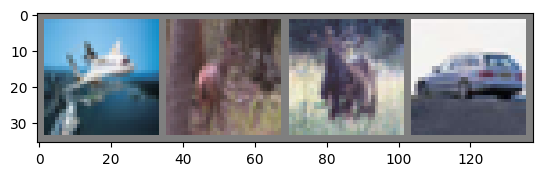

plane  deer  deer   car


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# 展示图片的函数
def imshow(img):
    img = img / 2 + 0.5     # 非归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 随机获取训练集图片
dataiter = iter(trainloader)
print(dataiter)
images, labels = next(dataiter)
print(images,labels)
# 展示图片
imshow(torchvision.utils.make_grid(images))
# 打印图片类别标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [28]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()



In [35]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [38]:
import time
start = time.time()
print(trainloader)
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入数据
        inputs, labels = data
        #print(inputs)
        #print(labels)
        # 清空梯度缓存
        optimizer.zero_grad()

        outputs = net(inputs)
        #print(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印统计信息
        running_loss += loss.item()
        if i % 2000 == 1999:
            # 每 2000 次迭代打印一次信息
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training! Total cost time: ', time.time()-start)

[1,  2000] loss: 1.601
[1,  4000] loss: 1.522
[1,  6000] loss: 1.488
[1,  8000] loss: 1.450
[1, 10000] loss: 1.406
[1, 12000] loss: 1.410
[2,  2000] loss: 1.322
[2,  4000] loss: 1.306
[2,  6000] loss: 1.282
[2,  8000] loss: 1.263
[2, 10000] loss: 1.250
[2, 12000] loss: 1.234
Finished Training! Total cost time:  108.47637271881104


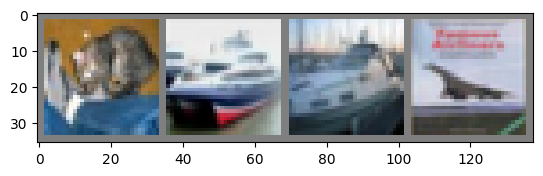

GroundTruth:    cat  ship  ship plane


In [43]:
# 测试
dataiter = iter(testloader)
images, labels = next(dataiter)

# 打印图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [44]:
# 网络输出
outputs = net(images)

# 预测结果
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship plane


In [45]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [46]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 69 %
Accuracy of  bird : 30 %
Accuracy of   cat : 18 %
Accuracy of  deer : 50 %
Accuracy of   dog : 64 %
Accuracy of  frog : 73 %
Accuracy of horse : 66 %
Accuracy of  ship : 74 %
Accuracy of truck : 67 %
